In [1]:
import sys
sys.path.insert(1,'..')
import learnHeat as lh
from importlib import reload
lh = reload(lh)
import pygsp as pg
import numpy as np
import random
import scores_table as scort
scort = reload(scort)
import matplotlib.pyplot as plt

In [24]:
trial = np.load('trial.npy')
trial += 1
experiments = 30
N = 100
tau0 = [0.5,1,2.5,4]
Mvec = [2,5,11]
quantiles = [0.01]+[i/100 for i in range(1, 100) if i % 5 == 0]+[0.99]
windows = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5]
finesse = [16, 32, 64, 128, 256, 512, 1024]
alpha = 0.01
beta = 0.1
score_res = np.zeros([experiments,len(Mvec),len(quantiles),3,2])
max_iter = 40
for i in range(experiments):
    ground_laplacians = []
    learned_laplacians = []
    for M in range(len(Mvec)):
        L = lh.heat_graph_BA(N,Mvec[M])
        ground_laplacians.append(L)
        X = lh.create_deltas(L,tau0)
        res = lh.learn_heat(X,tau0=tau0,alpha=alpha,beta=beta,max_iter=max_iter)
        L_learned = res["L"]
        L_learned[abs(L_learned)<0.001] = 0
        learned_laplacians.append(L_learned)

    for j in range(len(Mvec)):
        # do stuff
        for q in range(len(quantiles)):
            score_res[i,j,q,0,:] = scort.both_scores(lh.heat_quantile(learned_laplacians[j],quantiles[q]),ground_laplacians[j])
        for f in range(len(finesse)):
            score_res[i,j,f,1,:] = scort.both_scores(lh.heat_persistent(learned_laplacians[j],finesse[f]),ground_laplacians[j])
        for w in range(len(windows)):
            score_res[i,j,w,2,:] = scort.both_scores(lh.weight_clusters(learned_laplacians[j],windows[w]),ground_laplacians[j])

np.save(f"BA_{trial}_experiments{experiments}_alpha_{alpha}_beta_{beta}_N{N}_iter{max_iter}_2511.npy",score_res)
np.save("trial.npy",trial)

In [2]:
check = np.load("BA_3_experiments30_alpha_0.01_beta_0.1_N100_iter40_2511.npy")

In [3]:
check.shape[:]

(30, 3, 21, 3, 2)

In [4]:
aux2 = np.std(check[:,0,:,0,0],axis=0).reshape(-1)
aux2

array([0.00788045, 0.0387049 , 0.03209977, 0.02462713, 0.01763791,
       0.01475449, 0.01298193, 0.01206926, 0.01037815, 0.00846032,
       0.00726536, 0.00601411, 0.00519212, 0.00445927, 0.00442552,
       0.00416001, 0.00320343, 0.00290148, 0.00257213, 0.00240944,
       0.002262  ])

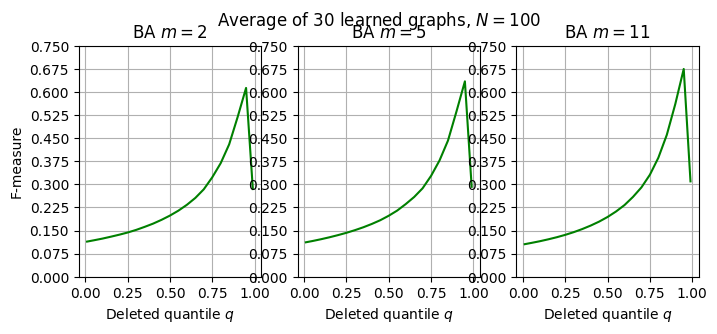

In [6]:
quantiles = [0.01]+[i/100 for i in range(1, 100) if i % 5 == 0]+[0.99]
def plot_quantiles(check,type,quantiles):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 30 learned graphs, $N=100$"),y=1)
    titles = [r"BA $m=2$",r"BA $m=5$",r"BA $m=11$"]
    for r in range(3):
        aux = np.mean(check[:,r,:,type,0],axis=0).reshape(-1)
        aux2 = np.std(check[:,r,:,type,0],axis=0).reshape(-1)
        ax[r].plot(quantiles,aux[::-1],color='g')
        ax[r].errorbar(quantiles,aux[::-1],yerr=aux2[::-1],fmt='o',color='r')
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Deleted quantile $q$")
        ax[r].set_xticks(np.linspace(0,1,5))
        ax[r].set_ylim(0,0.75)
        ax[r].set_yticks(np.linspace(0,0.75,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
plot_quantiles(check,0,quantiles)

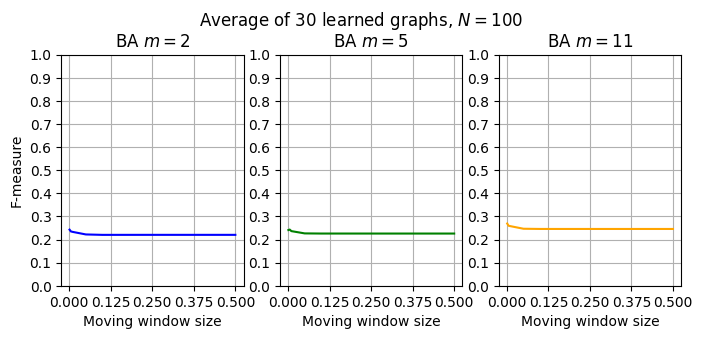

In [7]:
def plot_quantiles(check,type,quantiles):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 30 learned graphs, $N=100$"),y=1.03)
    titles = [r"BA $m=2$",r"BA $m=5$",r"BA $m=11$"]
    colors = ['b','g','orange']
    for r in range(3):
        aux = np.mean(check[:,r,0:len(quantiles),type,0],axis=0).reshape(-1)
        ax[r].plot(quantiles,aux,color=colors[r])
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Moving window size")
        ax[r].set_xticks(np.linspace(0,quantiles[-1],5))
        ax[r].set_ylim(0,1)
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
plot_quantiles(check,2,[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5])

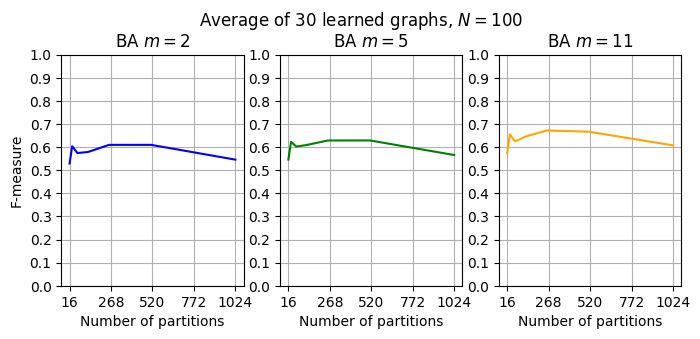

In [28]:
def plot_quantiles(check,type,quantiles):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3),sharex=True)
    fig.suptitle((r"Average of 30 learned graphs, $N=100$"),y=1.03)
    titles = [r"BA $m=2$",r"BA $m=5$",r"BA $m=11$"]
    colors = ['b','g','orange']
    for r in range(3):
        aux = np.mean(check[:,r,0:len(quantiles),type,0],axis=0).reshape(-1)
        ax[r].plot(quantiles,aux,color=colors[r])
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Number of partitions")
        ax[r].set_xticks(np.linspace(16,quantiles[-1],5))
        ax[r].set_ylim(0,1)
        ax[r].set_yticks(np.linspace(0,1,11))
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
plot_quantiles(check,1,[16, 32, 64, 128, 256, 512, 1024])

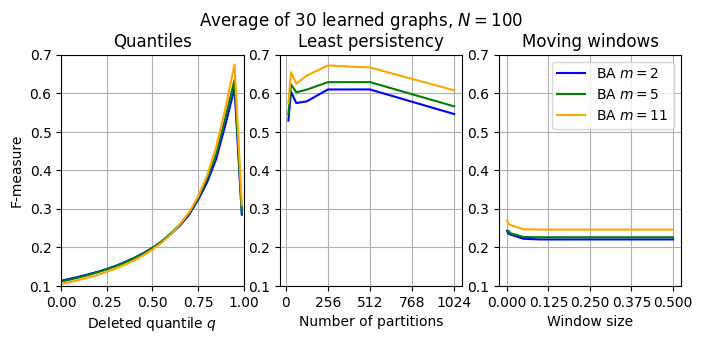

In [27]:
quantiles = [0.01]+[i/100 for i in range(1, 100) if i % 5 == 0]+[0.99]
def plot_quantiles(check,quantile,windows,finesse):
    # plot the three graphs all quantiles
    fig, ax = plt.subplots(1,3,figsize=(8,3))
    fig.suptitle((r"Average of 30 learned graphs, $N=100$"),y=1.03)
    titles = ["Quantiles","Least persistency","Moving windows"]
    titles2 = [r"BA $m=2$",r"BA $m=5$",r"BA $m=11$"]
    colors = ['b','g','orange']
    for r0 in range(3):
        r=0
        aux = np.mean(check[:,r0,0:len(quantile),r,0],axis=0).reshape(-1)
        ax[r].plot(quantile,aux[::-1],label=titles2[r0],color=colors[r0])
        ax[r].set_title(titles[r])
        ax[r].set_xlabel(r"Deleted quantile $q$")
        ax[r].set_xticks(np.linspace(0,1,5))
        ax[r].set_ylim(0.1,0.7)
        ax[r].set_xlim(0,1)
        ax[r].grid(True)
    for r1 in range(3):
        r=2
        aux = np.mean(check[:,r1,0:len(windows),r,0],axis=0).reshape(-1)
        ax[r].plot(windows,aux,label=titles2[r1],color=colors[r1])
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Window size")
        ax[r].set_xticks(np.linspace(0,windows[-1],5))
        ax[r].set_ylim(0.1,0.7)
        ax[r].grid(True)
        ax[r].legend()
    for r2 in range(3):
        r=1
        aux = np.mean(check[:,r2,0:len(finesse),r,0],axis=0).reshape(-1)
        ax[r].plot(finesse,aux,label=titles2[r2],color=colors[r2])
        ax[r].set_title(titles[r])
        ax[r].set_xlabel("Number of partitions")
        ax[r].set_xticks(np.linspace(0,finesse[-1],5))
        ax[r].set_ylim(0.1,0.7)
        ax[r].grid(True)
    ax[0].set_ylabel("F-measure")
plot_quantiles(check,[0.01]+[i/100 for i in range(1, 100) if i % 5 == 0]+[0.99],[0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.25, 0.5],[16, 32, 64, 128, 256, 512, 1024])

In [110]:
aux = np.mean(check[:,0,0:len(quantiles),0,0],axis=0).reshape(-1)
aux

array([0.28460208, 0.61302003, 0.51827913, 0.42972288, 0.36870597,
       0.32271168, 0.28386434, 0.25579448, 0.23343045, 0.21454252,
       0.1985279 , 0.184656  , 0.1723071 , 0.16177919, 0.15197067,
       0.14356462, 0.13638714, 0.12987493, 0.12366335, 0.11825676,
       0.11407376])